Ex 1)

In [1]:
#importing the required packages
import pandas as pd

In [2]:
#Please copy the 'cleveland_heart_attr.csv' and 'cleveland_heart_attr_description.txt' files to the current folder in colab
#read the csv file into a dataframe
df = pd.read_csv('cleveland_heart_attr.csv')

In [3]:
#check the data frame by printing its first few rows 
df.head()

age  sex  ...  thal  heart_disease_status
0  63.0  1.0  ...   6.0                     0
1  67.0  1.0  ...   3.0                     2
2  67.0  1.0  ...   7.0                     1
3  37.0  1.0  ...   3.0                     0
4  41.0  0.0  ...   3.0                     0

[5 rows x 14 columns]

In [4]:
#check the data frame by printing its last  few rows 
df.tail()

age  sex  ...  thal  heart_disease_status
298  45.0  1.0  ...   7.0                     1
299  68.0  1.0  ...   7.0                     2
300  57.0  1.0  ...   7.0                     3
301  57.0  0.0  ...   3.0                     1
302  38.0  1.0  ...   3.0                     0

[5 rows x 14 columns]

In [5]:
#1) [R]
#how many rows and columns does df have?
print('Num of rows: ',df.shape[0])
print('Num of columns: ',df.shape[1])

Num of rows:  303
Num of columns:  14


In [6]:
#Printing the columns in df
df.columns

Index(['age', 'sex', 'chest_pain_type', 'rest_bp', 'serum_cholesterol',
       'fastblood_sugar', 'rest_ecg', 'max_heartrate', 'exercise_angina',
       'ST_depression_exercise_relativeto_rest', 'slope_peak_STsegment',
       'num_major_vessels_fluroscopy', 'thal', 'heart_disease_status'],
      dtype='object')

In [7]:
#Let us try to check the description of the data 
data_description = open('cleveland_heart_attr_description.txt','r').read()
print (data_description)

Publication Request: 
   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   This file describes the contents of the heart-disease directory.

   This directory contains 1 database concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
    following location:

     1. Cleveland Clinic Foundation (cleveland.data)

While the database contains 76 attributes, only  14 attributes were actually used in past experiments. 

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

1. Title: Heart Disease Databases

2. Source Information:
   (a) Creators: 
       -- 1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
   (b) Donor: David W. Aha (aha@ics.uci.edu) (714) 856-8779   
   (c) Date: July, 1988


3. Relevant Information:
     This database contains 76 attributes, but all published experiments
     refer to using a subset of 14 of them.  In particular, the Cleveland
     database is th

In [8]:
#If an explicit description about data is missing, we can try to understand the data using basic statistical information
df.describe()

age         sex  ...  slope_peak_STsegment  heart_disease_status
count  303.000000  303.000000  ...            303.000000            303.000000
mean    54.438944    0.679868  ...              1.600660              0.937294
std      9.038662    0.467299  ...              0.616226              1.228536
min     29.000000    0.000000  ...              1.000000              0.000000
25%     48.000000    0.000000  ...              1.000000              0.000000
50%     56.000000    1.000000  ...              2.000000              0.000000
75%     61.000000    1.000000  ...              2.000000              2.000000
max     77.000000    1.000000  ...              3.000000              4.000000

[8 rows x 12 columns]

In [9]:
#for categorical variables we can use the following
df.describe(include=object)


num_major_vessels_fluroscopy thal
count                           303  303
unique                            5    4
top                             0.0  3.0
freq                            176  166

In [10]:
#To get other information about the data, we can use info() 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age                                     303 non-null    float64
 1   sex                                     303 non-null    float64
 2   chest_pain_type                         303 non-null    float64
 3   rest_bp                                 303 non-null    float64
 4   serum_cholesterol                       303 non-null    float64
 5   fastblood_sugar                         303 non-null    float64
 6   rest_ecg                                303 non-null    float64
 7   max_heartrate                           303 non-null    float64
 8   exercise_angina                         303 non-null    float64
 9   ST_depression_exercise_relativeto_rest  303 non-null    float64
 10  slope_peak_STsegment                    303 non-null    float6

2) [R]Why are the num_major_vessels_fluroscopy and thal columns considered object types? Write the reason.

Ans ->  Num_major_vessels_fluoroscopy and thal columns are considered to be object types because integers in this data are describing some quantities which are not numeric. For example, in thal column 3 indicates normal , 6 indicates fixed defect and 7 indicates reversable defect and similarly 0,1,2,3 represnts some colours in fluoroscopy.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f253d263210>]],
      dtype=object)

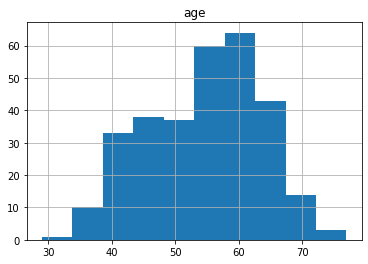

In [11]:
#Let us try to understand the age distribution of the patients in the data
#For this we will use a simple histogram. We will use pandas' hist() utility  

df.hist(column='age')


3) [R] From the histogram identify the number of bins and bin size. Report these quantities.

 Number of bins  = 10, Bin size = (77-29)/10 = 4.8

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25357b3250>]],
      dtype=object)

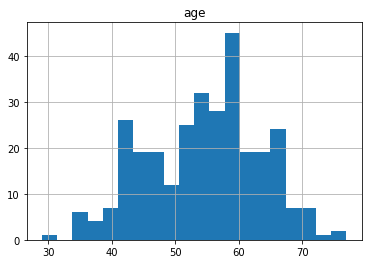

In [12]:
#We can adjust the bin size and replot the histogram
df.hist(column='age',bins=20)


What is the bin size in this case? 

 Bin size = (77-29) / 20  = 2.4

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25352a53d0>]],
      dtype=object)

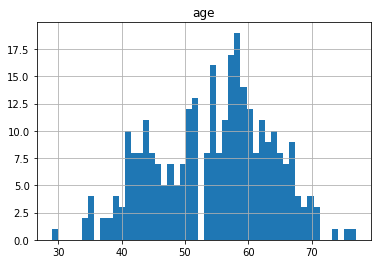

In [13]:
#[R]Plot the histogram for 50 bins and report the bin size and your observations. 
df.hist(column = 'age', bins = 50)

4)What is the bin size in this case? 

 Bin size = (77-29) / 50  = 0.96

In [14]:
#Other interesting plots out of histograms can be made with other packages, especially 'seaborn'
#For this purpose we shall import seaborn package
import seaborn as sns 

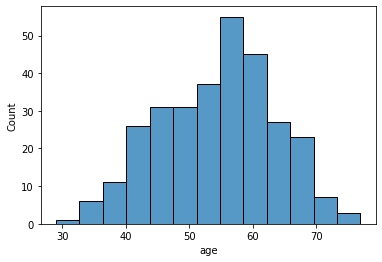

In [15]:
#seaborn has its own histogram plotting utility
sns.histplot(df.age)

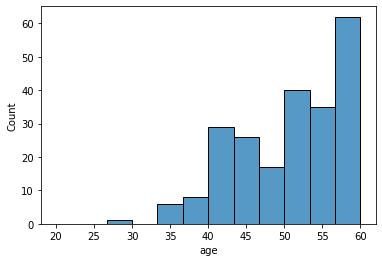

In [16]:
#We can change some options in histplot and try replotting
sns.histplot(df.age,binrange=(20,60))

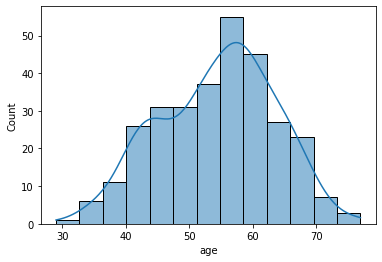

In [17]:
#The age distribution can be plotted as a graph based on the underlying histogram 
sns.histplot(df.age,kde=True)

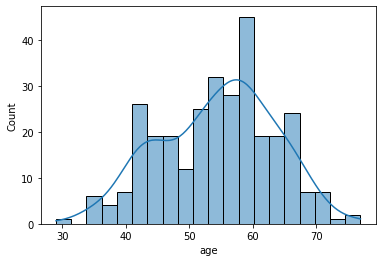

In [18]:
#Replotting the distribution for a more fine-grained bin size
sns.histplot(df.age,bins=20,kde=True)

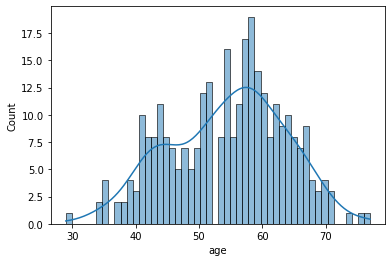

In [19]:
#Replotting the distribution for 50 bins
sns.histplot(df.age,bins=50,kde=True)

5) [R] What is the KDE option useful for in histplot()? Explain the details.

-> Kernel density estimator (KDE) is a non-parametric way to estimate the probability density function of a random variable or we can say that it is a method for visualizing the distribution of observations in a dataset.This function uses Gaussian kernels and includes automatic bandwidth determination.KDE can produce plots that are less clustered and more interpretable, especially when drawing multiple distributions. The quality of representation depends on the selection of good smoothing parameters.

6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2524d12a50>]],
      dtype=object)

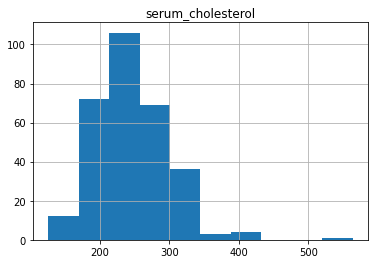

In [20]:
#[R] Plot pandas based histogram and seaborn based histogram for serum_cholesterol attribute. Use bin sizes from {default, 20, 50, 100, 200, 500}. For seaborn, use KDE. Report the observations. 

df.hist(column = 'serum_cholesterol')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2524b92b50>]],
      dtype=object)

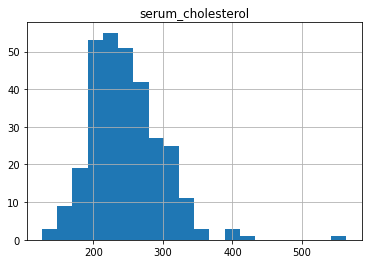

In [21]:
df.hist(column = 'serum_cholesterol',bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2524ab6e50>]],
      dtype=object)

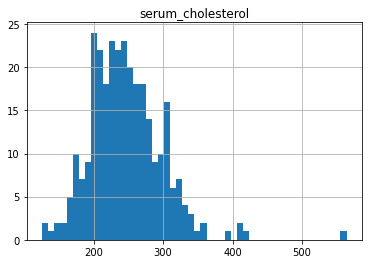

In [22]:
df.hist(column = 'serum_cholesterol',bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25249c6610>]],
      dtype=object)

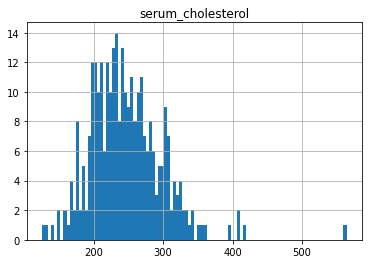

In [23]:
df.hist(column = 'serum_cholesterol',bins = 100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2524846110>]],
      dtype=object)

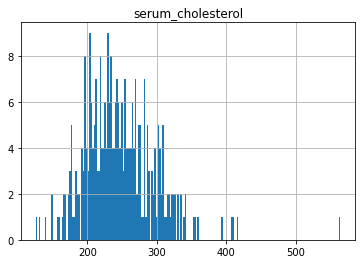

In [24]:
df.hist(column = 'serum_cholesterol',bins = 200)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25245e1690>]],
      dtype=object)

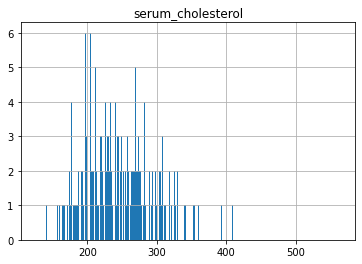

In [25]:
df.hist(column = 'serum_cholesterol',bins = 500)

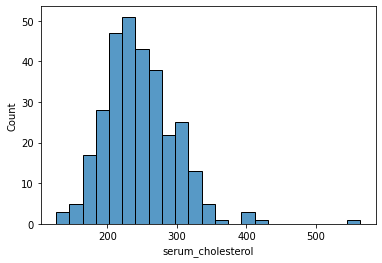

In [26]:
sns.histplot(df.serum_cholesterol)

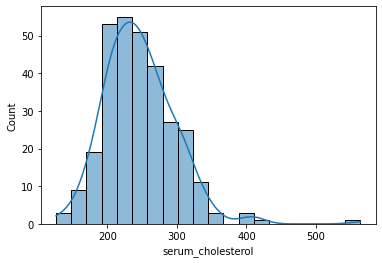

In [27]:
sns.histplot(df.serum_cholesterol, bins = 20,kde = True)

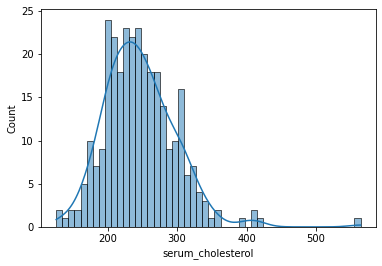

In [28]:
sns.histplot(df.serum_cholesterol, bins = 50,kde = True)

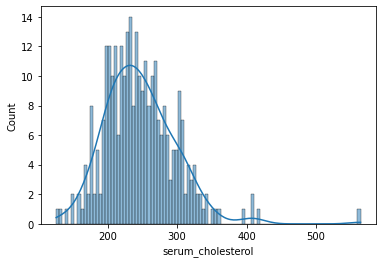

In [29]:
sns.histplot(df.serum_cholesterol, bins = 100,kde = True)

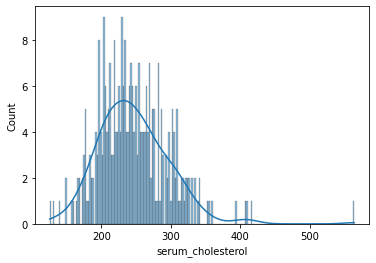

In [30]:
sns.histplot(df.serum_cholesterol, bins = 200,kde = True)

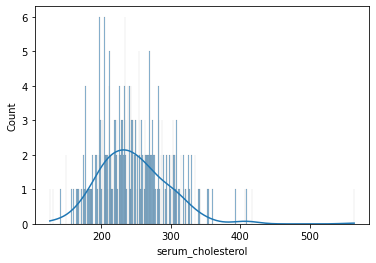

In [31]:
sns.histplot(df.serum_cholesterol, bins = 500,kde = True)

6) Observations: All these plots are showing the frequency distribution of the same data using different different bins width.Plot which are drawn using seaborn package looks more nice as each bin is can be seen separately without any confusion.As we go on increasing number of bins the kde curve is getting flatter and flatter while bandwidth seems to be same for all plots.

From these graphs we can interpret that people with serum_cholesterol ranging from 200-300 are more  compared to other range of values.People with serum_cholesterol 500 are near to 0.

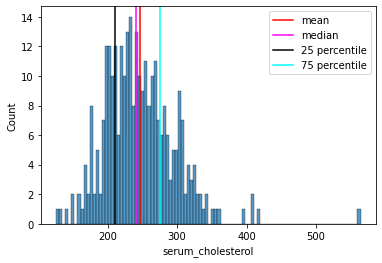

In [32]:
#7) [R] Add to the above plot containing mean and median, the vertical lines to represent the 25 percentile and 75 percentile values in the serum_cholesterol attribute. Use different colors and appropriate legend.
import matplotlib.pyplot as plt
import numpy as np
sns.histplot(df.serum_cholesterol, bins=100)
plt.axvline(x=np.mean(df.serum_cholesterol),color='red',label='mean')
plt.axvline(x=np.median(df.serum_cholesterol),color='magenta',label='median')
plt.axvline(x = np.percentile(df.serum_cholesterol,25), color ='black',label = '25 percentile')
plt.axvline(x = np.percentile(df.serum_cholesterol,75), color ='cyan',label = '75 percentile')
plt.legend(loc='upper right')

In [33]:
#Let us use bar plots now to understand about the data description
#To do this let us first introduce new column to the data frame indicating the gender of patient
df['gender'] = np.where(df['sex']==1.0,'male','female')

In [34]:
df.head()


age  sex  chest_pain_type  ...  thal  heart_disease_status  gender
0  63.0  1.0              1.0  ...   6.0                     0    male
1  67.0  1.0              4.0  ...   3.0                     2    male
2  67.0  1.0              4.0  ...   7.0                     1    male
3  37.0  1.0              3.0  ...   3.0                     0    male
4  41.0  0.0              2.0  ...   3.0                     0  female

[5 rows x 15 columns]

In [35]:
gender_counts = pd.crosstab(index=df.gender, columns='count')

In [36]:
gender_counts

col_0   count
gender       
female     97
male      206

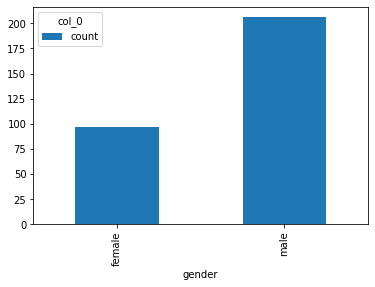

In [37]:
gender_counts.plot(kind='bar')

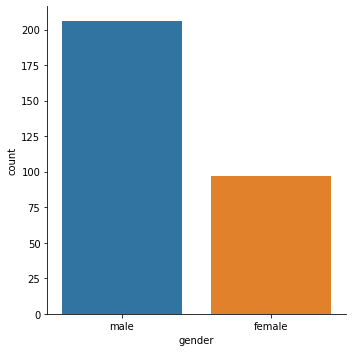

In [38]:
#A relatively easy way for plotting the bar plots is given using seaborn
sns.catplot(x="gender",data=df,kind='count')

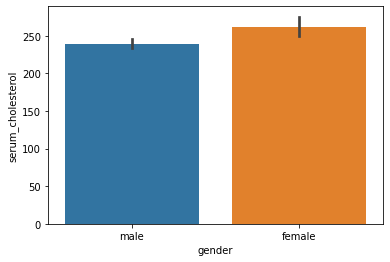

In [39]:
#Let us plot the bar plot for gender vs serum_cholesterol 
sns.barplot(x="gender",y="serum_cholesterol",data=df)



What does the plot describe? What are the vertical bars in each bar? 

-> The plot desribes how the data is distributed ,what can be the highest value all thse things.Here this plot describes thedata ditribution of gender corresponding to serum_cholesterol level.
The vertical lines in each bar are the error bars that represent the confidence interval, that is the measure how much data is varying from the mean(by default) value.

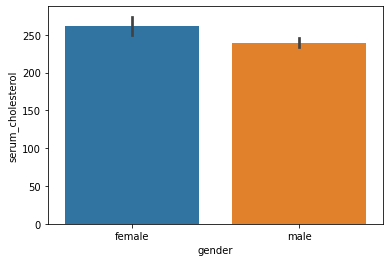

In [40]:
#8) [R} Change the order in the bar plots from male, female to female, male
sns.barplot(x="gender",y="serum_cholesterol",data=df, order  = ['female','male'])



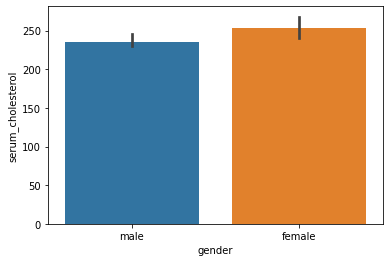

In [41]:
#9) Let us try the barplot with a different option
sns.barplot(x="gender",y="serum_cholesterol",data=df,estimator=np.median)


9) [R] Explain the difference between the plot obtained below using the median estimator and the plot obtained above.

->In the first plot we did not gave estimator argument ,so by default data is aggregated as the mean value of a variable while in the second plot we set estimator to be median , so now the data is aggregated as the median value of a variable (serum_cholesterol).




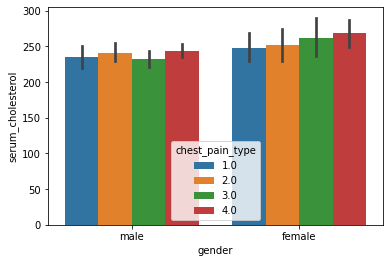

In [42]:
#We can create bar plots with even more fine-grained grouping
#Let us group according to chest_pain_type
sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type",data=df)


10) Explain the observations from the plot.

 -> This graph represents the data of males and females grouped according to chest_pain_type , that is males who have chest_pain of level 1 grouped together and their data is plotted by considering mean values of variables.
 
 Also we can see that males with chest pain of level 1 are those who have smallest serum_cholesterol while females with chest_pain of level 4 are those who have highest serum_cholesterol and so on.

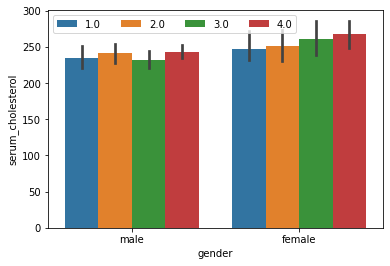

In [43]:
#We can adjust the positioning of the legend. 
ax = sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type",data=df)
ax.legend(loc='upper left', ncol=4)

Text(0, 0.5, 'Serum Cholesterol')

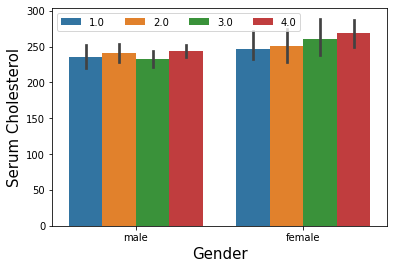

In [44]:
#We can adjust the positioning of the legend. 
ax = sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type",data=df)
ax.legend(loc='upper left', ncol=4)
ax.set_xlabel("Gender",fontsize=15)
ax.set_ylabel("Serum Cholesterol",fontsize=15)

[Text(0, 0, 'male'), Text(0, 0, 'female')]

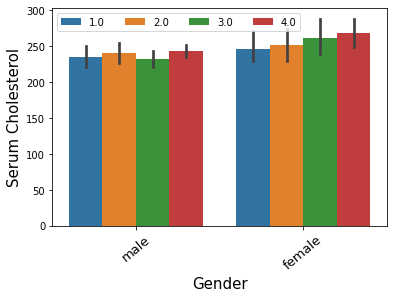

In [45]:
#We can also adjust the display effects of the labels on axes
ax = sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type",data=df)
ax.legend(loc='upper left', ncol=4)
ax.set_xlabel("Gender",fontsize=15)
ax.set_ylabel("Serum Cholesterol",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=13,rotation=40)


[Text(0, 0, 'male'), Text(0, 0, 'female')]

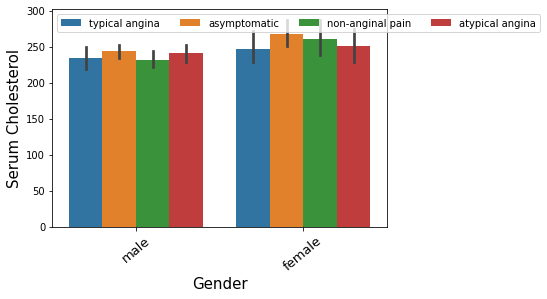

In [61]:
#11) [R} Note that the chest_pain_type is numerical and hence is of less value in the plot above. 
# To make the plot more meaningful, insert a new column to the dataframe which contains the description according to the corresponding chest_pain_type code. 
# Name this column as chest_pain_type_description. 
# To fill the values in this chest_pain_type_description column, take the description for chest_pain_type from description file.  
# Construct the above grouped bar plot where the grouping is now with respect to the textual description of the chest_pain_type. 
# Add an appropriate legend and display the legend in a position where the bar graphs are clearly visible. conf

conditions = [(df['chest_pain_type'] == 1.0), df['chest_pain_type'] == 2.0, df['chest_pain_type'] == 3.0, df['chest_pain_type'] == 4.0]
choices = ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']

df['chest_pain_type_description'] = np.select(conditions, choices)

ax = sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type_description",data=df )
ax.legend(loc='upper left', ncol=4)
ax.set_xlabel("Gender",fontsize=15)
ax.set_ylabel("Serum Cholesterol",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=13,rotation=40)

patch height: 235.05263157894737
patch width: 0.2
patch x: -0.4 patch y: 0
patch height: 247.0
patch width: 0.2
patch x: 0.6 patch y: 0
patch height: 241.03125
patch width: 0.2
patch x: -0.2 patch y: 0
patch height: 251.44444444444446
patch width: 0.2
patch x: 0.8 patch y: 0
patch height: 232.23529411764707
patch width: 0.2
patch x: 2.7755575615628914e-17 patch y: 0
patch height: 261.0571428571429
patch width: 0.2
patch x: 1.0 patch y: 0
patch height: 243.60576923076923
patch width: 0.19999999999999996
patch x: 0.20000000000000007 patch y: 0
patch height: 268.475
patch width: 0.19999999999999996
patch x: 1.2000000000000002 patch y: 0


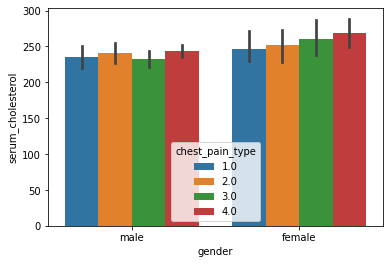

In [47]:
#We can work with the different components of the bar plot if we want to process them individually
#We will consider the bar plot based on gender vs serum_cholesterol
plot = sns.barplot(x="gender",y="serum_cholesterol",hue = 'chest_pain_type',data=df)

#plot has bars which can be obtained from plot.patches
for patch in plot.patches:
  print('patch height:',patch.get_height())
  print('patch width:',patch.get_width())
  print('patch x:',patch.get_x(), 'patch y:',patch.get_y())
  


[233.625      245.42742718]
[0 0]
[[  0.         233.625     ]
 [  0.         245.42742718]]
[249.68737113 275.70309278]
[1 1]
[[  1.         249.68737113]
 [  1.         275.70309278]]


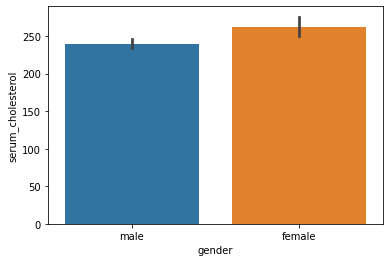

In [48]:
#We can work with the different components of the bar plot if we want to process them individually
#We will consider the bar plot based on gender vs serum_cholesterol
plot = sns.barplot(x="gender",y="serum_cholesterol",data=df)

#plot has error lines which can be obtained from plot.lines
for line in plot.lines:
  print(line.get_ydata())
  print(line.get_xdata())
  print(line.get_xydata())


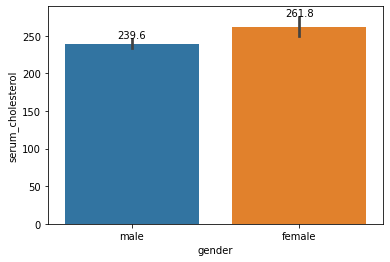

In [49]:
#we can also use annotations for bar plots
#We will consider the bar plot based on gender vs serum_cholesterol
plot = sns.barplot(x="gender",y="serum_cholesterol",data=df)
  

for p,line in zip(plot.patches, plot.lines):
    plot.annotate(format(p.get_height(),'.1f'), 
                   (p.get_x() + p.get_width() / 2., line.get_ydata()[1]), 
                   ha = 'center', va = 'top', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


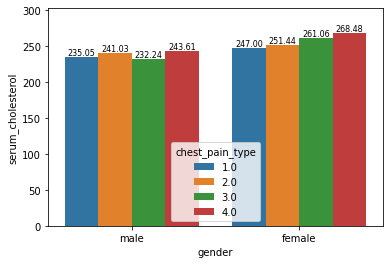

In [50]:
#12) [R] Add an appropriate annotation indicating the value of the upper boundary values of the bar plots in the gender vs serum_cholesterol bar plot grouped according to chest_pain_type attribute. 

plot = sns.barplot(x="gender",y="serum_cholesterol",hue = "chest_pain_type",data=df,errcolor='None')
  

for p,line in zip(plot.patches, plot.lines):
    plot.annotate(format(p.get_height(),'.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'top', size= 8,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Text(0.3, 300.73313106796115, 'The average serum cholesterol\n for men is lower!')

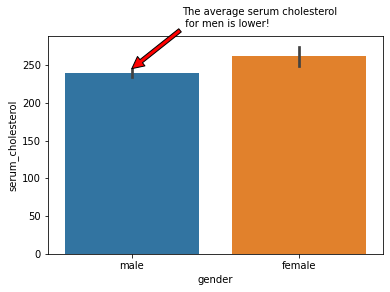

In [51]:
import matplotlib.pyplot as plt
#There are other ways to add annotations to bar plots 
#We will consider the bar plot based on gender vs serum_cholesterol
plot = sns.barplot(x="gender",y="serum_cholesterol",data=df)

plot.patches[0].get_x()

x=plot.patches[0].get_x() + plot.patches[0].get_width() / 2.
y=plot.lines[0].get_ydata()[1]
plt.annotate('The average serum cholesterol\n for men is lower!', xy=(x,y), xytext=(x+0.3,y+55.5), arrowprops=dict(facecolor='red'))

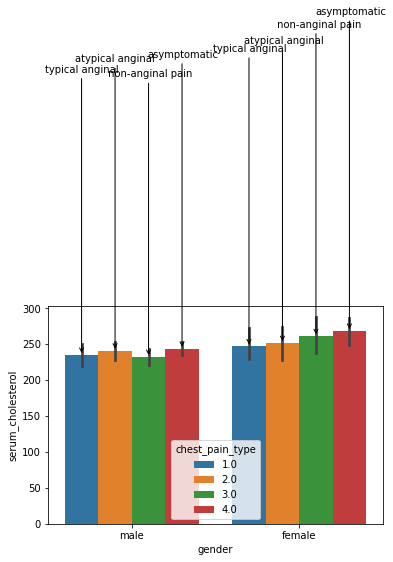

In [52]:
#13) [R] Add an appropriate annotation with pointed arrows and with textual description in bar plot of gender vs serum_cholesterol bar plot grouped according to chest_pain_type attribute. 
# Color the arrow with a color other than red. 
a = ['typical anginal','typical anginal','atypical anginal','atypical anginal', ' non-anginal pain', ' non-anginal pain', 'asymptomatic','asymptomatic']

plot = sns.barplot(x="gender",y="serum_cholesterol", hue = "chest_pain_type",data=df)
i = 0
for patch in plot.patches:
  x=patch.get_x() + patch.get_width() / 2.
  y=patch.get_height()
  plt.annotate(a[i], xy=(x,y), xytext=(x+0.3,y+55.5),textcoords = 'offset pixels', arrowprops=dict(facecolor='black',arrowstyle = '->',connectionstyle = "angle,angleA=0,angleB=90,rad =10"),ha = 'center',va='top')
  i = i+1
  


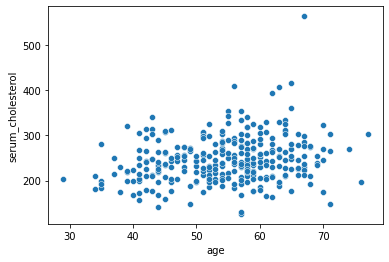

In [53]:
#To capture whether two attributes are correlated, one way is to use scatter plot
#Let us try to see if age is related to serum_cholesterol

sns.scatterplot(x="age",y="serum_cholesterol",data=df)
 

14) [R] Explain your observations from the scatter plot.

-> We cannot interpret anything for sure from scatter plot but it can be seen that people of age between 50 to 60 serum_cholesterol level is more in  range of 200 to 300. Also near age 30 , 70 people with serum_cholesterol level are very less in number.

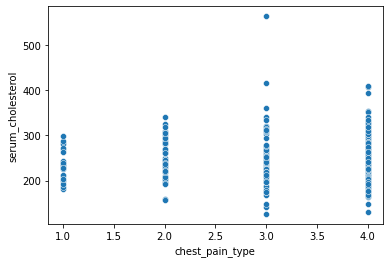

In [54]:
#Let us plot the relation between chest_pain_type and serum_cholesterol

sns.scatterplot(x="chest_pain_type",y="serum_cholesterol",data=df)

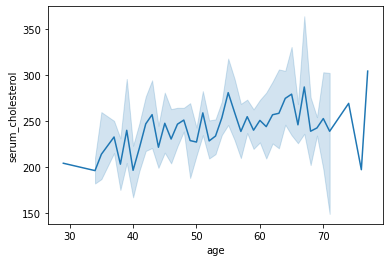

In [55]:
#We can also use lineplot to plot the relationship between variables
sns.lineplot(x="age",y="serum_cholesterol",data=df)


15) [R] What do the light-colored bands and the dark central line indicate in the above line plot? 

-> Light colored bands represent the 95% confidence interval for the mean of each variable(group) ,also our sample size is larger that is why light coloured band is more precise. 
The dark line shows the mean value of each variable. 

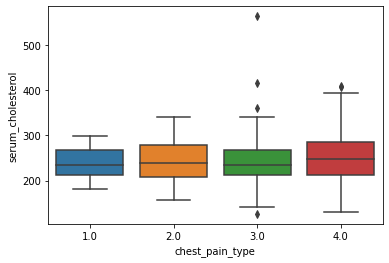

In [56]:
#We can use blox plots which would provide details about summary statistics 
sns.boxplot(x="chest_pain_type",y="serum_cholesterol",data=df)

16) [R] What do the upper and lower boundaries of the box indicate? What does the line inside the box indicate? What are the points marked beyond the error bars?  Explain.

-> Upper boundary of the box indicates 75th percentile(the value at which 75% of the data values are below this) and lower boundary of the box indicates 25th percentile(the value at which 25% of the data values are below this). 

The line inside the box  indicates the median values of a variable.
Points marked beyond error bars are the points that are determined to be outliers.

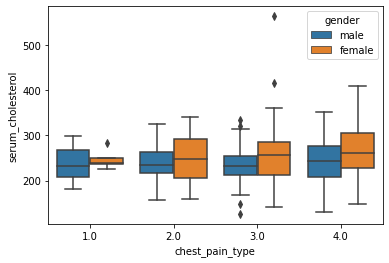

In [57]:
#We can also group the above box plots according to gender
#recall "hue" in barplot
sns.boxplot(x="chest_pain_type",y="serum_cholesterol",hue="gender",data=df)

17) [R] Discuss the observations made from the previous box plot.

-> The above boxplot shows the data statistics grouped according to males and females. From this plot we can see the for females with chest_pain_type 1 the upper boundary and the lower boundary of the box are very close to each other so the inner quartile range(measure of spread of data) is very less,except an outlier,which means that serum cholesterol in females of chest pain type 1 is near to 250(approx) .
In males of chest pain type 3 the median line is exactly at the center of the box, which means that data is spread equally above and below median.Also there are 4 outliers in this ,2 above and two below.

Also we can see that in some boxplots their are no outliers, which means that all the data is in the inner quartile range.

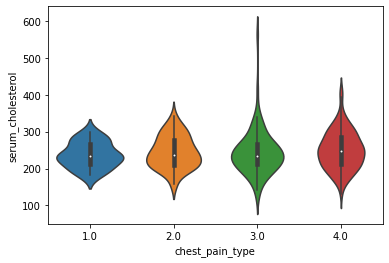

In [58]:
#[R] Use violinplot to plot the relationship between chest_pain_type and serum_cholesterol and discuss the observations. 
sns.violinplot(x = 'chest_pain_type',y = 'serum_cholesterol',data = df)

18) The violin plot shows tha data almost similar to boxplot. Here a white dot on the violin plot show median value, the black bar in the center of violin shows inner quartile range.The black lines streched from the bar shows the lower or upper adjacent values which are defined as **first quartile - 1.5 IQR and third quartile + 1.5 IQR**.Observations lying outside of these fences are considered to be outliers.These are more uesul when more than one peaks are there.
These plots are showing probabilty density of the data at different values smoothed by Kernel density estimator(KDE). They are showing  data distribution compared between chest_pain_type and serum cholesterol. In chest_pain of type 3 the data is distributed so nicely with little bit more elongation and the peaks are very sharp in this case.

Also we can say that data in chest_pain type 3 and 4 is nicely distributed compared to type 1 and 2.

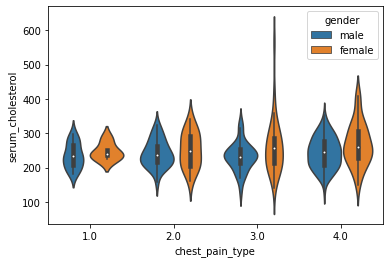

In [59]:
#[R] Can you group the violinplots based on gender information? If so, prepare the corresponding plots and discuss the observations. 
#yes we  can group the violinplots based on gender information.
sns.violinplot(x = 'chest_pain_type',y = 'serum_cholesterol',hue = 'gender',data = df)

18) In the above plot we can see that  in females of  chest pain type 1 elongation is very less while in chest pain type 2 and 4 the elongation is more comparatively. Also width of the plot of males of chest pain type 4 is more but elongation is not more this means that data is distributed near to each other.